In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")



In [3]:
df = pd.read_excel("bank.xlsx")

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


#  ==> Data Cleaning




In [5]:
df["default"] = np.where(df["default"] == "yes", 1, 0)
df["housing"] = np.where(df["housing"] == "yes", 1,0)
df["loan"] = np.where(df["loan"] == "yes", 1,0)
df["deposit"] = np.where(df["deposit"] == "yes", 1,0)

In [6]:
df["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [7]:
df["job"] = df["job"].replace(["management","admin.","entrepreneur"],"white-collar")
df["job"] = df["job"].replace(["technician","services"],"blue-collar")
df["job"] = df["job"].replace(["retired","self-employed"],"self-depend")
df["job"] = df["job"].replace(["student"],"unemployed")
df["job"].value_counts()

job
blue-collar     4690
white-collar    4228
self-depend     1183
unemployed       717
housemaid        274
unknown           70
Name: count, dtype: int64

In [8]:
df["poutcome"].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [9]:
df["poutcome"] = df["poutcome"].replace(["unknown"],"other")
df["poutcome"].value_counts()

poutcome
other      8863
failure    1228
success    1071
Name: count, dtype: int64

In [10]:
df.drop(columns = "month",inplace = True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,0,2343,1,0,unknown,5,1042,1,-1,0,other,1
1,56,white-collar,married,secondary,0,45,0,0,unknown,5,1467,1,-1,0,other,1
2,41,blue-collar,married,secondary,0,1270,1,0,unknown,5,1389,1,-1,0,other,1
3,55,blue-collar,married,secondary,0,2476,1,0,unknown,5,579,1,-1,0,other,1
4,54,white-collar,married,tertiary,0,184,0,0,unknown,5,673,2,-1,0,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,cellular,20,257,1,-1,0,other,0
11158,39,blue-collar,married,secondary,0,733,0,0,unknown,16,83,4,-1,0,other,0
11159,32,blue-collar,single,secondary,0,29,0,0,cellular,19,156,2,-1,0,other,0
11160,43,blue-collar,married,secondary,0,0,0,1,cellular,8,9,2,172,5,failure,0


# => Outliers Removal

In [11]:
def IQR(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3 - q1
  lf = q1 - (1.5*iqr)
  uf = q3 + (1.5*iqr)
  print("LF",lf)
  print("UF",uf)

In [12]:
IQR(df["age"])

LF 6.5
UF 74.5


In [13]:
IQR(df["pdays"])

LF -33.625
UF 53.375


In [14]:
IQR(df["previous"])

LF -1.5
UF 2.5


In [15]:
IQR(df["campaign"])

LF -2.0
UF 6.0


In [16]:
IQR(df["duration"])

LF -399.0
UF 1033.0


In [17]:
IQR(df["balance"])

LF -2257.0
UF 4087.0


In [18]:
df["balance"] = np.where(df["balance"]>4087.0,4087.0,df["balance"])
df["balance"] = np.where(df["balance"]<-2257.0,-2257.0,df["balance"])
df["age"] = np.where(df["age"]>74,74,df["age"])
df["duration"] = np.where(df["duration"]>1033,1033,df["duration"])
df["campaign"] = np.where(df["campaign"]>6,6,df["campaign"])
df["pdays"] = np.where(df["pdays"]>53,53,df["pdays"])
df["previous"] = np.where(df["previous"]>2,2,df["previous"])

In [19]:
df.select_dtypes(object).columns

Index(['job', 'marital', 'education', 'contact', 'poutcome'], dtype='object')

In [20]:
bank = pd.get_dummies(df,columns = ['job', 'marital', 'education', 'contact', 'poutcome'], drop_first=True)

In [21]:
X = bank.drop(columns = ["deposit"])
y = bank["deposit"]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("train_accu: ",dt.score(X_train,y_train))
print("test_accu: ",dt.score(X_test,y_test))

train_accu:  1.0
test_accu:  0.7375727720555306


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy",
                            max_depth=5,
                            min_samples_split=10,
                            random_state=5)
dt.fit(X_train,y_train)
print("train_accu ",dt.score(X_train,y_train))
print("test_accu ",dt.score(X_test,y_test))

train_accu  0.8033374398028894
test_accu  0.7841468875951635


In [24]:
max_depth = [2,4,5,8,10]
min_samples_split = [10,20,30,40,50,60,70,80,90,100]
criterion = ["gini","entropy"]
for c in criterion:
  for d in max_depth:
    for s in min_samples_split:
      dt = DecisionTreeClassifier(criterion=c,
                                  max_depth = d,
                                  min_samples_split=s,
                                  random_state = 55)
      dt.fit(X_train,y_train)
      print("criterion --> {}  max_depth --> {} min_sam -->  {}".format(c,d,s))
      print("train_accu ",dt.score(X_train,y_train))
      print("test_accu ",dt.score(X_test,y_test))
      print("/****************************************************************/")

criterion --> gini  max_depth --> 2 min_sam -->  10
train_accu  0.7314368910292306
test_accu  0.7111509180474698
/****************************************************************/
criterion --> gini  max_depth --> 2 min_sam -->  20
train_accu  0.7314368910292306
test_accu  0.7111509180474698
/****************************************************************/
criterion --> gini  max_depth --> 2 min_sam -->  30
train_accu  0.7314368910292306
test_accu  0.7111509180474698
/****************************************************************/
criterion --> gini  max_depth --> 2 min_sam -->  40
train_accu  0.7314368910292306
test_accu  0.7111509180474698
/****************************************************************/
criterion --> gini  max_depth --> 2 min_sam -->  50
train_accu  0.7314368910292306
test_accu  0.7111509180474698
/****************************************************************/
criterion --> gini  max_depth --> 2 min_sam -->  60
train_accu  0.7314368910292306
test_accu  0.7111

In [25]:
DecisionTreeClassifier(criterion="entropy",
                       max_depth= 12,
                       min_samples_split=90,
                       min_samples_leaf = 1,
                       random_state=55)
dt.fit(X_train,y_train)
print("train_accu ",dt.score(X_train,y_train))
print("test_accu ",dt.score(X_test,y_test))

train_accu  0.8305521334975922
test_accu  0.7931034482758621


In [26]:
from sklearn.tree import plot_tree

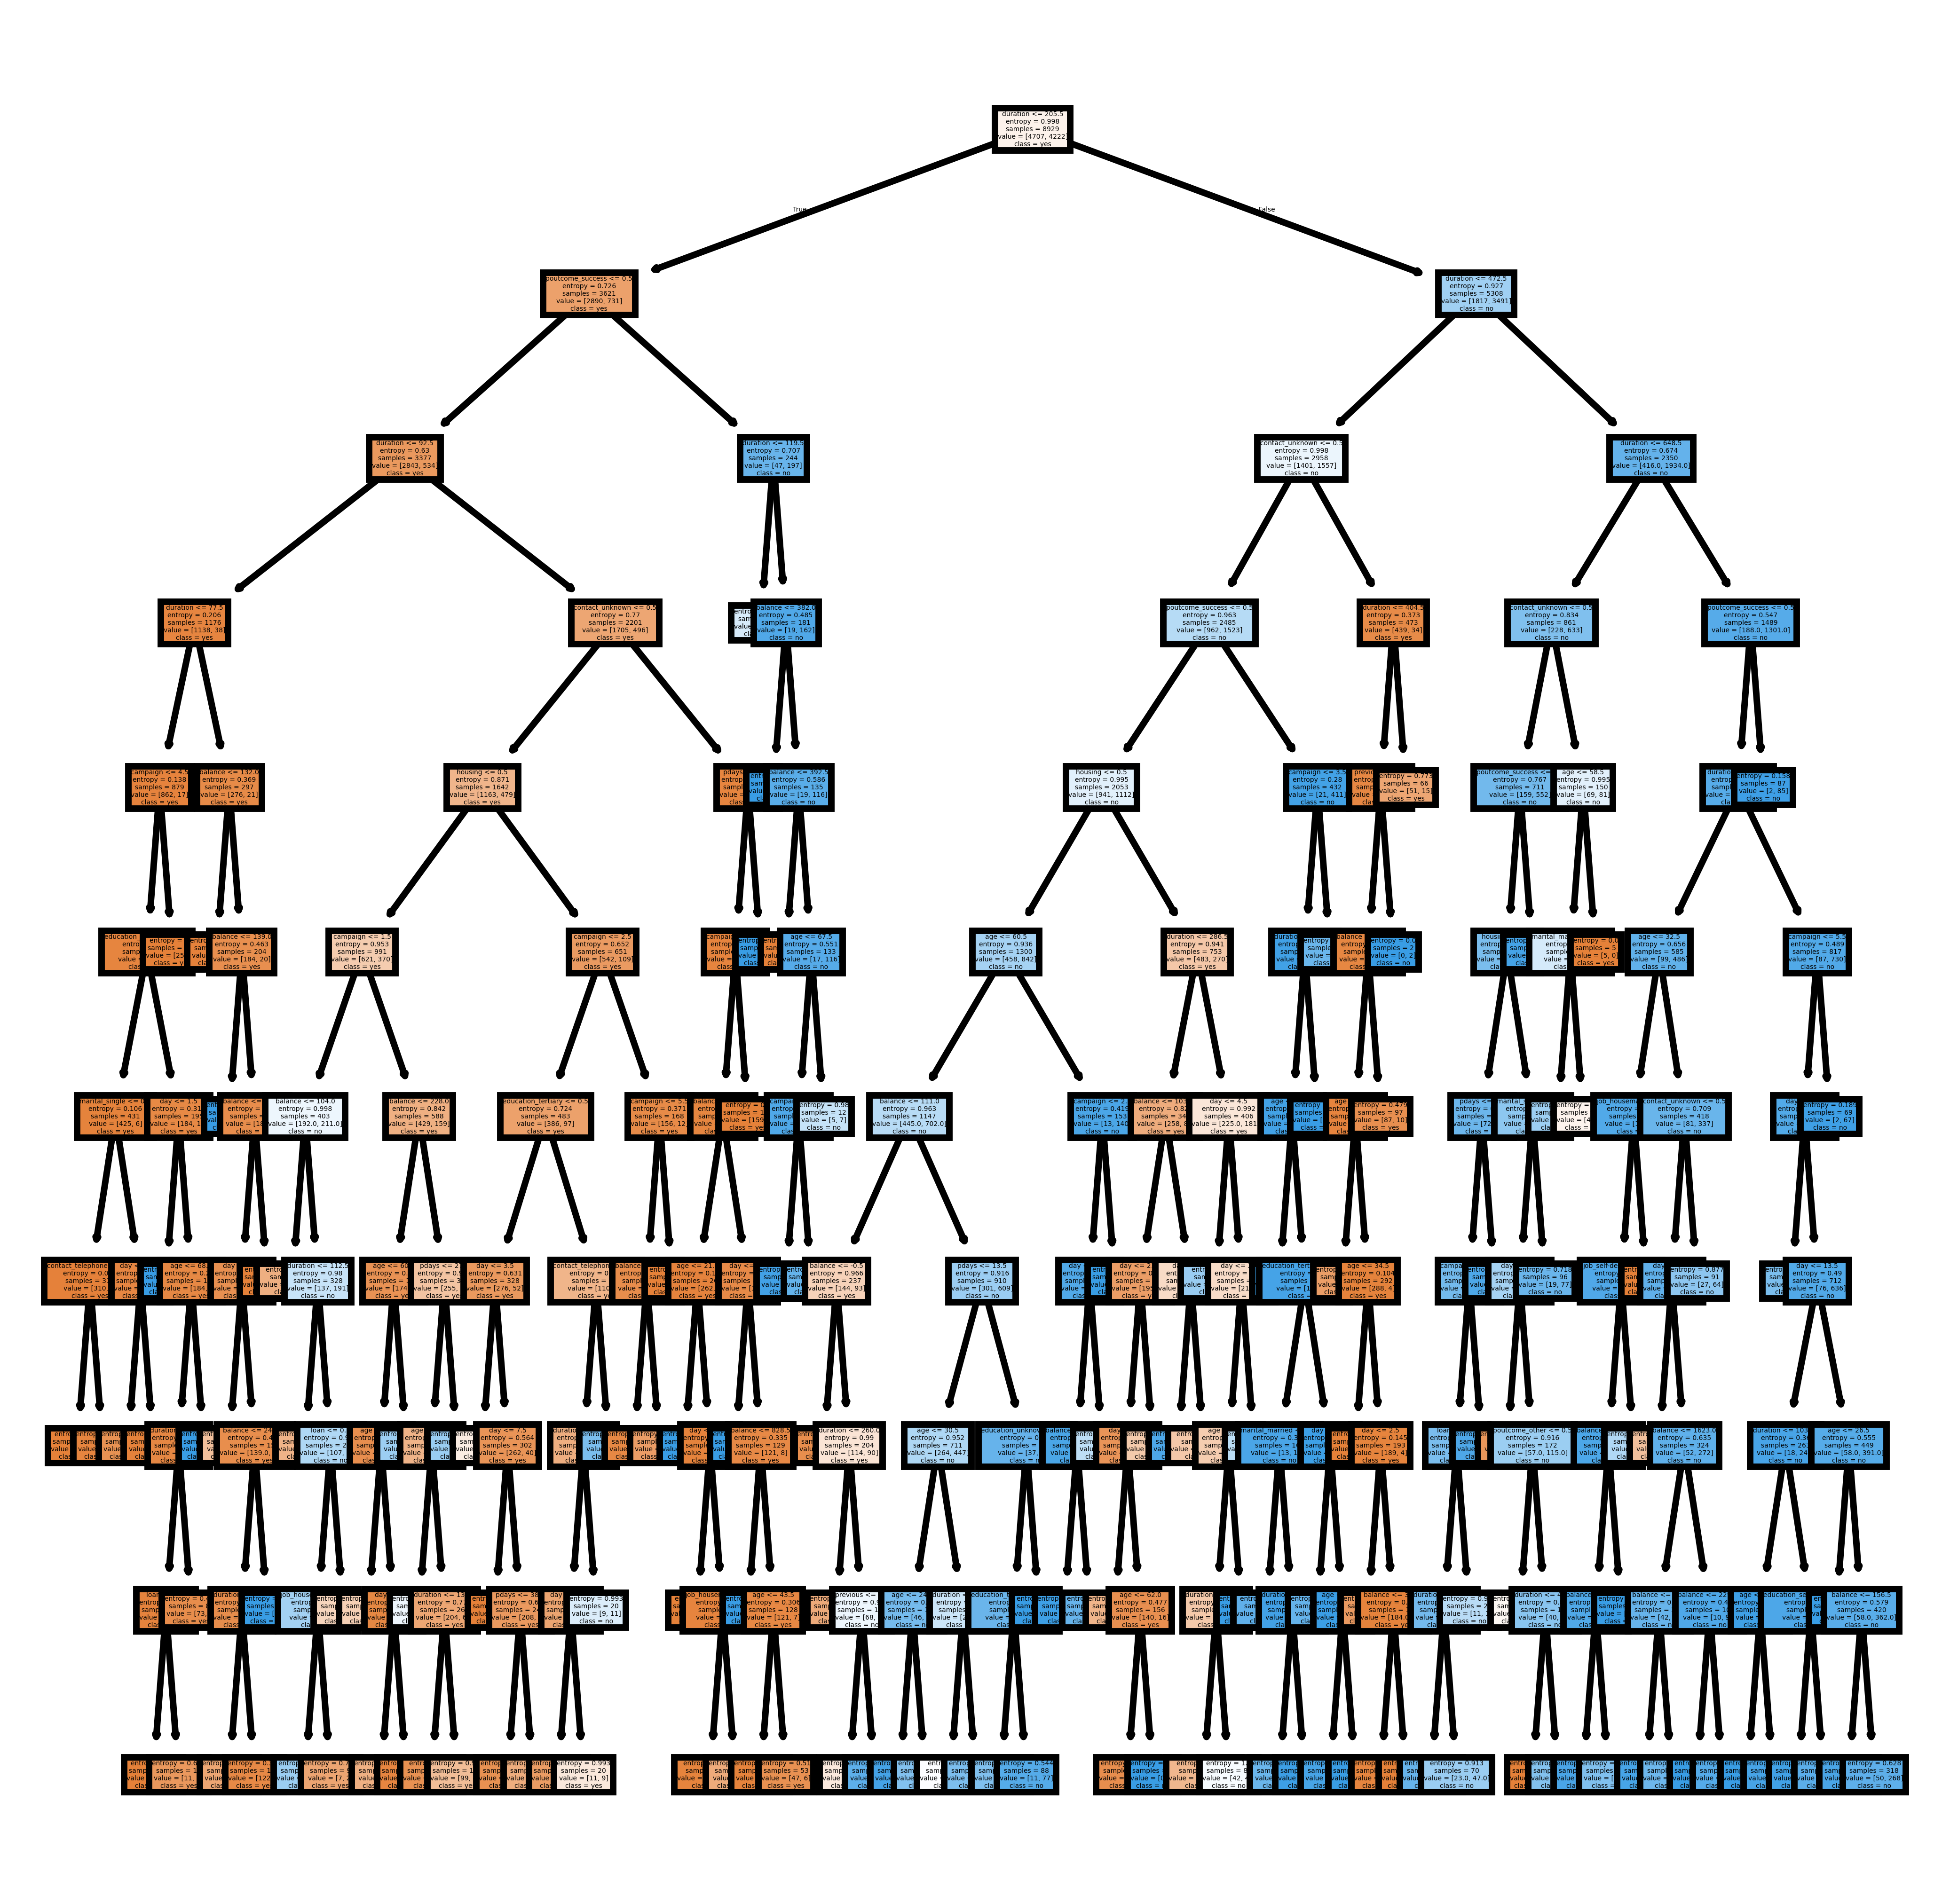

In [27]:
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 1000)
plot_tree(dt,feature_names = X_train.columns, class_names = ["yes","no"], filled = True)
plt.show()

In [28]:
from sklearn import tree

In [29]:
rules = tree.export_text(dt,feature_names = X_train.columns, class_names = ["yes","no"])
print(rules)

|--- duration <= 205.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 92.50
|   |   |   |--- duration <= 77.50
|   |   |   |   |--- campaign <= 4.50
|   |   |   |   |   |--- education_tertiary <= 0.50
|   |   |   |   |   |   |--- marital_single <= 0.50
|   |   |   |   |   |   |   |--- contact_telephone <= 0.50
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |--- contact_telephone >  0.50
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |--- marital_single >  0.50
|   |   |   |   |   |   |   |--- day <= 10.50
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |--- day >  10.50
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- education_tertiary >  0.50
|   |   |   |   |   |   |--- day <= 1.50
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |--- day >  1.50
|   |   |   |   |   |   |   |--- age <= 68.00
|   |   |   |   |   |   |   |   |--- duration <= 60.50
| 

In [30]:
from sklearn.model_selection import GridSearchCV
dt

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=100,
                       random_state=55)

In [31]:
para = {"criterion" : ["gini","entropy"],
        "max_depth": [2,4,6,8,10,12,14,15,16],
        "min_samples_split": [40,50,60,70,80,90,100,110,120]}
tre = DecisionTreeClassifier(random_state = 77)
grid  = GridSearchCV(tre,param_grid = para, cv = 5, verbose = 1, n_jobs = -1 )
grid.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=77), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 15, 16],
                         'min_samples_split': [40, 50, 60, 70, 80, 90, 100, 110,
                                               120]},
             verbose=1)

In [38]:
dt = DecisionTreeClassifier(criterion = "entropy",
                            max_depth = 14,
                            min_samples_split = 120,
                            min_samples_leaf = 1,
                            random_state = 77)

In [39]:
dt.fit(X_train,y_train)
print("Train_accu ", dt.score(X_train,y_train))
print("Test_accu ", dt.score(X_test,y_test))

Train_accu  0.8378317840743644
Test_accu  0.7922077922077922


In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_train, dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4707
           1       0.81      0.85      0.83      4222

    accuracy                           0.84      8929
   macro avg       0.84      0.84      0.84      8929
weighted avg       0.84      0.84      0.84      8929



In [36]:
#from sklearn import tree
#text_representation = tree.export_text(dt)
#print(text_representation)

In [37]:
#from matplotlib import pyplot as plt
#fig = plt.figure(figsize = (25,20))
#tree.plot_tree(dt)